<a href="https://colab.research.google.com/github/Semy-sudo/CATMOS/blob/yein/%EC%A2%85%EB%B6%84%EB%A5%98_%EC%86%A1%EC%98%88%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#구글 드라이브로 부터 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [30]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.5.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/external/*
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.5.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/nccl_archive/_virtual_includes/include_hdrs/alloc.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/nccl_archive/_virtual_includes/include_hdrs/argcheck.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/nccl_archive/_virtual_includes/include_hdrs/bootstrap.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/nccl_archive/_virtual_includes/include_hdrs/channel.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/exte

In [31]:
!pip install tensorflow==1.2

     |████████████████████████████████| 35.0MB 47.9MB/s 
     |████████████████████████████████| 245kB 39.3MB/s 
  Created wheel for markdown: filename=Markdown-2.2.0-cp36-none-any.whl size=136308 sha256=10ae1043ad21368d00cf5c710d479d9fefdc19c352ab1241166dc0f713e5b560
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
Successfully built markdown
ERROR: tensorflow-tensorboard 1.5.1 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
ERROR: tensorboard 2.2.1 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
  Found existing installation: Markdown 3.2.2
    Uninstalling Markdown-3.2.2:
      Successfully uninstalled Markdown-3.2.2


In [0]:
!apt-get -qq install -y libfluidsynth1

In [94]:
from PIL import Image # PIL 이미지 처리 기능 패키지
import os, glob, numpy as np 
from sklearn.model_selection import train_test_split #데이터 분할해주는 함수 train, validation, test

#경로 가져오기
caltech_dir = "/content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train"
#작은 카테고리
categories = ["Siberia", "sham", "Rusianblue","ragdoll","Persian","boombey","Bengal"]
nb_classes = len(categories)  # len함수: 문자열 길이 반환

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = [] 
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)] 
    label[idx] = 1
    
    #cat = "Rusianblue", "봄베이", "Persian", "Siberia"  8 개 중 하나
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg") #glob함수: 파일명을 문자열로 반환
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        #변환한 이미지 파일을 data로 
        data = np.asarray(img) #numpy 배열로 변환

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f) #종류 : 데이터 개수

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 러시안블루
#0 1 0 0 이면 봄베이 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
#경로에 train test data 를 multi_image_data 로 저장
np.save("/content/drive/My Drive/Colab Notebooks/numpy_data/multi_image_data.npy", xy) #xy 배열을 해당 경로에 저장

print("ok", len(y))
print("ok", len(X))


Siberia  파일 길이 :  184
Siberia  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/Siberia/Siberia (76).jpg
sham  파일 길이 :  199
sham  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/sham/siam (1).jpg
Rusianblue  파일 길이 :  207
Rusianblue  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/Rusianblue/러시안블루2.jpg
ragdoll  파일 길이 :  200
ragdoll  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/ragdoll/ragdoll1.jpg
Persian  파일 길이 :  190
Persian  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/Persian/persian1.jpg
boombey  파일 길이 :  191
boombey  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/boombey/bombay001.jpg
Bengal  파일 길이 :  99
Bengal  :  /content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/Bengal/bengal (37).jpg
ok 1

In [25]:
pip install keras==2.2.1

  Using cached https://files.pythonhosted.org/packages/71/26/1e778ebd737032749824d5cba7dbd3b0cf9234b87ab5ec79f5f0403ca7e9/Keras_Preprocessing-1.0.2-py2.py3-none-any.whl
ERROR: tensorflow-gpu 2.2.0 has requirement keras-preprocessing>=1.1.0, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2


In [24]:
!pip install numpy==1.16.2
import numpy as np

In [33]:
pip install --upgrade tensorflow-gpu

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.2.0)
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 2.2MB/s 
ERROR: tensorflow 1.2.0 has requirement markdown==2.2.0, but you'll have markdown 3.2.2 which is incompatible.
ERROR: keras 2.2.1 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.1.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
  Found existing installation: Markdown 2.2.0
    Uninstalling Markdown-2.2.0:
      Successfully uninstalled Markdown-2.2.0


In [95]:

import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K   

import tensorflow as tf   #GPU 구현에 있어서 메모리를 절약해서 사용하기 위한 코드
#config = tf.ConfigProto()
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
#session = tf.Session(config=config)






X_train, X_test, y_train, y_test = np.load('/content/drive/My Drive/Colab Notebooks/numpy_data/multi_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(y_train[:10])
print(X_train.shape)
print(X_train.shape[1:])
print(X_test.shape)

(952, 64, 64, 3)
[[0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]]
(952, 64, 64, 3)
(64, 64, 3)
(318, 64, 64, 3)


In [0]:
#"러시안블루", "봄베이", "Persian", "Siberia"
categories = ["Siberia", "sham", "Rusianblue","ragdoll","Persian","boombey","Bengal"]
nb_classes = len(categories) 

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [0]:
#모델 학습하기
with K.tf_ops.device('/device:GPU:0'):


    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(64,64,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    

    #model = Sequential()
    #model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
    
    #model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
    
    #model.add(Flatten())
    #model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [61]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [98]:
#epoch 너무 높아도 정확도 안나옴


#데이터셋이 적어서 validation을 그냥 test 데이터로 했습니다. 
#데이터셋이 충분하시면 이렇게 하시지 마시고 validation_split=0.2 이렇게 하셔서 테스트 셋으로 나누시길 권장합니다.

#모델 학습시키기
#입력데이터/라벨값/ 가중치 /학습횟수 /비슷한게 5번이상나오면 학습중단

#model.fit_generator(
#       (X_train, y_train),
#        steps_per_epoch=15,
#        epochs=50,
#        validation_data=(X_test, y_test),
#        callbacks=[checkpoint, early_stopping])

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Train on 952 samples, validate on 318 samples
Epoch 1/50
952/952 [==============================] - 17s 17ms/step - loss: 1.8842 - accuracy: 0.3298 - val_loss: 1.4018 - val_accuracy: 0.4088

Epoch 00001: val_loss improved from inf to 1.40180, saving model to ./model/multi_img_classification.model
Epoch 2/50
952/952 [==============================] - 16s 17ms/step - loss: 1.1751 - accuracy: 0.5525 - val_loss: 1.1312 - val_accuracy: 0.5818

Epoch 00002: val_loss improved from 1.40180 to 1.13120, saving model to ./model/multi_img_classification.model
Epoch 3/50
952/952 [==============================] - 16s 17ms/step - loss: 0.7847 - accuracy: 0.7395 - val_loss: 1.1884 - val_accuracy: 0.5912

Epoch 00003: val_loss did not improve from 1.13120
Epoch 4/50
952/952 [==============================] - 16s 17ms/step - loss: 0.5168 - accuracy: 0.8204 - val_loss: 1.3604 - val_accuracy: 0.5786

Epoch 00004: val_loss did not improve from 1.13120
Epoch 5/50
952/952 [==============================] - 

In [99]:
#epoch 너무 높아도 정확도 안나옴
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

318/318 [==============================] - 1s 4ms/step
정확도 : 0.5818


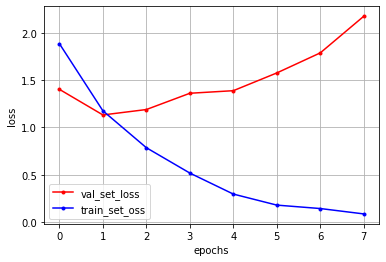

In [100]:

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()
#학습에 대한 오차< 검증용 오차

In [105]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3


X = []
filenames = []
name = []
files = glob.glob(caltech_dir+"/*.*")
model = load_model('./model/multi_img_classification.model')
cnt=0
for i, f in enumerate(files):
    #print(f)
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    prediction = model.predict(data[np.newaxis])
    np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
    
    for i in prediction:
      pre_ans = i.argmax()  # 예측 레이블
      pre_ans_str = ''
      # 순서 "Rusianblue", "봄베이", "Persian", "Siberia"
      #"Siberia", "sham", "Rusianblue","ragdoll","Persian","boombey","Bengal"
      if pre_ans == 0: pre_ans_str = "Siberia"
      elif pre_ans == 1: pre_ans_str = "sham"
      elif pre_ans == 2: pre_ans_str = "Rusianblue"
      elif pre_ans == 1: pre_ans_str = "ragdoll"
      elif pre_ans == 2: pre_ans_str = "Persian"
      elif pre_ans == 1: pre_ans_str = "boombey"
      else: pre_ans_str = "Bengal"
      if i[0] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
      if i[1] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
      if i[2] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
      if i[3] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
      if i[4] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
      if i[5] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
      if i[6] >= 0.8: print("해당 "+filenames[cnt].split("/")[8]+"이미지는 "+pre_ans_str+"로 추정됩니다.")


      cnt += 1

해당 뱅갈1.jpg이미지는 sham로 추정됩니다.
해당 뱅갈2.jpg이미지는 Bengal로 추정됩니다.
해당 Siberia2.jpg이미지는 Siberia로 추정됩니다.
해당 ragdoll18.jpg이미지는 Bengal로 추정됩니다.
해당 ragdoll55.jpg이미지는 Bengal로 추정됩니다.
해당 ragdoll30.jpg이미지는 Bengal로 추정됩니다.
해당 ragdoll28.jpg이미지는 Bengal로 추정됩니다.
해당 ragdoll82.jpg이미지는 Bengal로 추정됩니다.
해당 ragdoll57.jpg이미지는 Bengal로 추정됩니다.
해당 bengal (1).jpg이미지는 Bengal로 추정됩니다.


In [93]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")

for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
    
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    # 순서 "Rusianblue", "봄베이", "Persian", "Siberia"
    if pre_ans == 0: pre_ans_str = "Rusianblue"
    elif pre_ans == 1: pre_ans_str = "봄베이"
    elif pre_ans == 2: pre_ans_str = "Persian"
    else: pre_ans_str = "Siberia"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

ValueError: ignored

In [0]:
import numpy as np
import os

np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# 원본 이미지 위치 
optInputPath = '/content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/Bengal'
# 늘릴 이미지가 저장될 위치
optOutputPath = '/content/drive/My Drive/Colab Notebooks/Cats dataset/multi_img_data/imgs_others/train/PlusBengal'

# 이미지 크기 조정 비율
optRescale = 1./255
# 이미지 회전 
optRotationRange=10
# 이미지 수평 이동
optWidthShiftRange=0.2
# 이미지 수직 이동
optHeightShiftRange=0.2
# 이미지 밀림 강도 
optShearRange=0.5
# 이미지 확대/ 축소 
optZoomRange=[0.9,2.2]
# 이미지 수평 뒤집기 
optHorizontalFlip = True 
# 이미지 수직 뒤집기 
optVerticalFlip = True
optFillMode='nearest'
# 이미지당 늘리는 갯수 
optNbrOfIncreasePerPic = 5
# 배치 수 
optNbrOfBatchPerPic = 5

'''
 총 개수 optNbrOfIncreasePerPic * optNbrOfBatchPerPic 
 예 >
 사진 1장에 
 optNbrOfIncreasePerPic = 5
 optNbrOfBatchPerPic = 5
 = 1 * 5 * 5 = 25장 생성  
'''

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=optRescale, 
                                   rotation_range=optRotationRange,
                                   width_shift_range=optWidthShiftRange,
                                   height_shift_range=optHeightShiftRange,
                                   shear_range=optShearRange,
                                   zoom_range=optZoomRange,
                                   horizontal_flip=optHorizontalFlip,
                                   vertical_flip=optVerticalFlip,
                                   fill_mode=optFillMode)
'''
폴더가 존재하는지 확인하고
없다면 생성 
'''
def checkFoler(path):
    try:
        if not(os.path.isdir(path)):
            os.makedirs(os.path.join(path))
    except OSError as e:
        if e.errno != errno.EEXIST:                        
            raise            

def increaseImage(path ,folder):
    for index in range(0,optNbrOfIncreasePerPic):                                   
        img = load_img(path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        # 부풀리는 이미지를 저장할 폴다가 존재하는지 확인
        # 없다면 생성 
        checkFoler(optOutputPath+folder)               
        print('index : ' + str(index))
        for batch in train_datagen.flow(x, batch_size=1, save_to_dir=optOutputPath+folder, save_prefix='bengal', save_format='jpg'):
            i += 1
            print(folder + " " + str(i))
            if i >= optNbrOfBatchPerPic: 
                break

def generator(dirName):
    checkFoler(optOutputPath)
    try:
        fileNames = os.listdir(dirName)
        for fileName in fileNames:
            fullFileName = os.path.join(dirName, fileName)
            if os.path.isdir(fullFileName):                
                generator(fullFileName)
            else:
                # 확장자 
                ext = os.path.splitext(fullFileName)[-1]
                # 폴더 이름 
                folderName = os.path.splitext(fullFileName)[0].split('/')[-2]
                if(ext == '.jpg'):                    
                    increaseImage(fullFileName, folderName)               
                    
    except PermissionError:
        pass

if __name__ == "__main__":
        generator(optInputPath)

In [0]:
# -*- coding: utf-8 -*-
import cv2

CAM_ID = 0
def capture(camid = CAM_ID):
    cam = cv2.VideoCapture(camid)
    if cam.isOpened() == False:
        print ('cant open the cam (%d)' % camid)
        return None

    ret, frame = cam.read()
    if frame is None:
        print ('frame is not exist')
        return None
    
    # png로 압축 없이 영상 저장 
    cv2.imwrite('messigray.png',frame, params=[cv2.IMWRITE_PNG_COMPRESSION,0])
    cam.release()

if __name__ == '__main__':
    capture()

In [0]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height
while(True):
    ret, frame = cap.read()
    frame = cv2.flip(frame, -1) # Flip camera vertically
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
cap.release()
cv2.destroyAllWindows()